# APA a.a. 22/23 - Algoritmo "Las Vegas" QuickSort

Lontani dal caso peggiore: Las Vegas QuickSort (Compito 2.1 delle note)

![alt text](2.1.jpg "QuickSort")

## Librerie necessarie

In [1]:
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\andre\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\andre\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



## Implementazione Algoritmo

Librerie necessarie. <br>
Numero di comparazioni da effetturare nella ricorsione.

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
Xr = 0 #Numero di Comparazioni

### Funzioni Ausiliarie
Funzione iniziale dell'algoritmo ricorsivo.<br>
Eseguo un controllo se la lista ha almeno due elementi procedo con la scelta randomina nel nuovo pivot, altrimenti ritorno.

In [3]:
# QuickSort con scelta del pivot casuale
def LV_QuickSort(list, start, end):
    #Se la lista ha almeno due elementi
    if(start < end):
        #Scelta del pivot
        indexPivot = randomPartition(list, start, end) 
        #Chiamata ricorsiva per la prima metà
        LV_QuickSort(list, start, indexPivot - 1)
        #Chiamata ricorsiva per la seconda metà
        LV_QuickSort(list, indexPivot + 1, end) 

Funzione per la scelta randomica del nuovo pivot.<br>
random.randrange(start, end): ritorna un valore casuale contenuto tra i limiti che gli vengono passati.<br>
Ottenuto il nuovo pivot scambio l'elemento che sta nella posizione del pivot con il primo elemento della lista.

In [4]:
# Scelta del pivot casuale
def randomPartition(list, start, end):
    #Scelta del pivot casuale nel range della lista
    randPivot = random.randrange(start, end) 
    #Scambio del pivot con il primo elemento della lista
    list[start], list[randPivot] = list[randPivot], list[start]
    #Chiamata della funzione partition
    return partition(list, start, end)

Funzione di partizione della lista.<br>
Scorro la lista, mantendo il conto del numero di confronti effettuati.<br>
Durante lo scorrimento della lista ordino i valori in ordine crescente.<br>
Completato il ciclo, scambio l'elemento nella posizione del pivot con l'elemento precedente all'indice i raggiunto.

In [5]:

# Funzione partition
def partition(list, start, end):
    i = start + 1 #Indice per scorrere la lista

    for j in range(start + 1, end + 1):
        global Xr 
        Xr += 1 #Incremento il numero di confronti
        if(list[j] < list[start]):
            #Scambio i valori
            list[i], list[j] = list[j], list[i]
            i += 1
    #Scambio il pivot con l'elemento precedente all'indice i
    list[start], list[i - 1] = list[i - 1], list[start]
    return i - 1

Funzione per l'iniziallizzazione di una lista di elementi casuali.<br>

In [6]:
# Funzione per creare una sequenza di numeri random
def randomSequence(list, nElements):
    for i in range(1, nElements+1):
        list.append(i)
    #Mischio la lista randomicamente
    random.shuffle(list) 

### MAIN

Inizializzazione della lista di comparazioni.<br>
Inizializzaione della lista di elementi casuali.<br>

In [7]:
# Numero di volte che viene eseguito l'algoritmo
numberRunning = pow(10, 5)

# Array per il numero di confronti
numberComparisons = np.zeros(numberRunning)

#Creo la sequenza di numeri
nElements = pow(10, 4)
list = []
randomSequence(list, nElements)    

Esecuzione dell'algoritmo.<br>

In [8]:
for i in range(0, numberRunning):
    tmp = list.copy()
    LV_QuickSort(tmp, 0, len(tmp)-1)
    numberComparisons[i] = Xr
    Xr = 0

#### Calcolo del valor medio e della deviazione standard

In [14]:
mean = 0 #Valore Medio 
std_dev = 0 #Deviazione Standard

mean = np.mean(numberComparisons)
std_dev = np.std(numberComparisons)

print("Numero di confronti massimo: ", np.max(numberComparisons))
print("Numero di confronti medio: ", mean)
print("Deviazione Standard: ", std_dev)

Numero di confronti massimo:  201178.0
Numero di confronti medio:  155775.2118
Deviazione Standard:  6455.321601345727


PLot del grafico.<br>

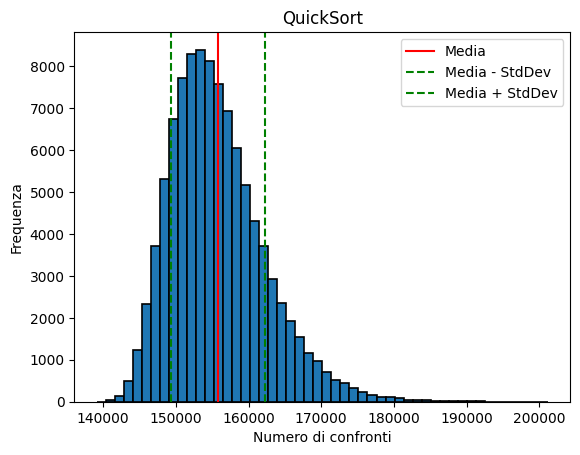

In [15]:
plt.hist(numberComparisons, bins = 50, edgecolor = 'black', linewidth = 1.2)
plt.axvline(x=mean, color='r', linestyle='-', label="Media")
plt.axvline(x=mean - std_dev, color='g', linestyle='--', label="Media - StdDev")
plt.axvline(x=mean + std_dev, color='g', linestyle='--', label="Media + StdDev")
plt.title('QuickSort')
plt.xlabel('Numero di confronti')
plt.ylabel('Frequenza')
plt.legend();
plt.show()

## Conclusioni
Basandomi sui risultati ottenuti, posso affermare che le probabilità che LV_Quicksort effettui il doppio e il quintuplo del valore medio dei confronti sono molto basse.<br>

Questa affermazione è supportata dal fatto che la scelta del pivot randomizzato, che è stata implementata in LV_Quicksort, riduce la probabilità di ottenere un pivot che sia il minimo o il massimo dell'array, e quindi di ottenere un albero ricorsivo sbilanciato, evitando così di cadere nel caso peggiore.<br>